## This script calculates features importance for each data set for the binary models. 

change the diractory to the dataset you want to use and the features list according to the choosen. 

In [1]:
import numpy as np
import random
import os
import time
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,RepeatedStratifiedKFold, cross_val_score, cross_validate
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import os
import matplotlib.pyplot as plt
import shutil
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2,f_classif
from sklearn import preprocessing
import math
from sklearn.metrics import fbeta_score
from numpy import arange
from sklearn.metrics import balanced_accuracy_score

In [4]:
def feature_importantce (Type,name,path,features):
    
    df = pd.read_excel(path).iloc[: , 1:] 
    if name == "Lavi":
        df = df[df.Site_Name=='Lavi'].copy(True)
    if name == "Kedma":
        df = df[df.Site_Name=='Kedma'].copy(True)
    if(Type ==  "Binary"):
        df.loc[df.Type == 'Clog', 'Y_binary'] =1 #malfunction
        df.loc[df.Type == 'Leak', 'Y_binary'] = 1 #malfunction
        df.loc[df.Type == 'Control', 'Y_binary'] = 0 
        y = df['Y_binary'].copy(True)
        X=df.drop(["Type",'Y_binary','Y'],axis=1).copy(True)
    if(Type =="Multi_cat"):
        y= df['Type'].copy(True)
        X = df.drop(["Type"],axis=1)
    if(Type =="Multi_ordinal"):
        Y_Ordinary = pd.DataFrame(df['Type']).copy(True) 
        Y_Ordinary['Y'] = 0 
        Y_Ordinary.loc[Y_Ordinary['Type'] == 'Clog', 'Y'] = 0
        Y_Ordinary.loc[Y_Ordinary['Type'] == 'Control', 'Y'] = 1
        Y_Ordinary.loc[Y_Ordinary['Type'] == 'Leak', 'Y'] = 2

        Y_Ordinary_new= pd.Series(Y_Ordinary['Type'], dtype="category")
        Y_Ordinary_new= Y_Ordinary_new.cat.codes
        # Y_Ordinary_new
        X=df.drop(["Type"],axis=1)
        y=Y_Ordinary_new
        y

    if(Type =="stage_2"):
        df.loc[df.Type == 'Clog', 'Y_binary'] = 0 #dry
        df.loc[df.Type == 'Control', 'Y_binary'] = 1 #wet
        df.loc[df.Type == 'Leak', 'Y_binary'] = 1 #wet
        y=df[['Y_binary']].copy(True)
        X=df.drop(['Type','Y_binary'],axis=1).copy(True)
    if(Type =="stage_1"):
        df.loc[df.Type == 'Clog', 'Y_binary'] = 1 #dry
        df.loc[df.Type == 'Control', 'Y_binary'] = 0 #wet
        df.loc[df.Type == 'Leak', 'Y_binary'] = 0 #wet
        y=df[['Y_binary']].copy(True)
        X=df.drop(['Type','Y_binary'],axis=1).copy(True)
    
    random.seed(10)

    #data_train, data_test, data_labels_train, data_labels_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    # X_train.info()
    ##accorfing to the paper
    forest = RandomForestClassifier(random_state=0)
    #forest.fit(data_train[features], data_labels_train)
    forest.fit(X[features], y)
# 
    start_time = time.time()
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    elapsed_time = time.time() - start_time
    print(importances)
    print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


    start_time = time.time()
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    elapsed_time = time.time() - start_time

    print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


    forest_importances = pd.Series(importances, index=features)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title(f'{name}'" Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

    dct = {"Type": Type,"Dataset": name,"Features": features,"Importnace":importances}
    print(dct)
    return dct

10
[0.094827   0.12723062 0.08669725 0.11201605 0.08356343 0.17306207
 0.05916219 0.05895124 0.07960026 0.12488988]
Elapsed time to compute the importances: 0.017 seconds
Elapsed time to compute the importances: 0.022 seconds
{'Type': 'Binary', 'Dataset': 'sde_david', 'Features': ['min', 'median', 'skewness', 'meanci_1', 'meanci_2', 'Diff_median_of_plot', 'Diff_std_of_plot', 'median_second_ring', 'CWSI', 'CWSI_minus_CWSI_of_row'], 'Importnace': array([0.094827  , 0.12723062, 0.08669725, 0.11201605, 0.08356343,
       0.17306207, 0.05916219, 0.05895124, 0.07960026, 0.12488988])}
1
[1.]
Elapsed time to compute the importances: 0.019 seconds
Elapsed time to compute the importances: 0.020 seconds
{'Type': 'Binary', 'Dataset': 'Lavi', 'Features': ['min'], 'Importnace': array([1.])}
15
[0.05279341 0.07186084 0.06247281 0.06830727 0.063544   0.06806117
 0.056809   0.08184155 0.05675765 0.06532789 0.05403018 0.07204592
 0.06120156 0.0573432  0.10760354]
Elapsed time to compute the importances:

<ipython-input-4-43a0f49ef51d>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X[features], y)


[0.1341078  0.14498026 0.12669613 0.12052385 0.15398386 0.17820348
 0.14150462]
Elapsed time to compute the importances: 0.019 seconds
Elapsed time to compute the importances: 0.020 seconds
{'Type': 'stage_1', 'Dataset': 'sde_david', 'Features': ['min', 'median', 'meanci_1', 'meanci_2', 'Diff_median_of_plot', 'Diff_mean_of_row', 'CWSI_minus_CWSI_of_row'], 'Importnace': array([0.1341078 , 0.14498026, 0.12669613, 0.12052385, 0.15398386,
       0.17820348, 0.14150462])}
3


<ipython-input-4-43a0f49ef51d>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X[features], y)


[0.26644377 0.42258205 0.31097418]
Elapsed time to compute the importances: 0.021 seconds
Elapsed time to compute the importances: 0.026 seconds
{'Type': 'stage_1', 'Dataset': 'Kedma', 'Features': ['meanci_1', 'Diff_median_of_plot', 'CWSI_minus_CWSI_of_row'], 'Importnace': array([0.26644377, 0.42258205, 0.31097418])}
18


<ipython-input-4-43a0f49ef51d>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X[features], y)


[0.03954992 0.03351581 0.06380532 0.02169563 0.05074115 0.01847263
 0.04616339 0.0310858  0.06218231 0.05571217 0.12904316 0.06212603
 0.08353844 0.03887568 0.04536188 0.06929759 0.03939852 0.10943457]
Elapsed time to compute the importances: 0.024 seconds
Elapsed time to compute the importances: 0.025 seconds
{'Type': 'stage_1', 'Dataset': 'Combined', 'Features': ['min', 'prctile95', 'prctile5', 'std', 'MTD', 'skewness', 'median', 'IQR', 'meanci_1', 'meanci_2', 'Diff_median_of_plot', 'Diff_mean_of_row', 'prctile33', 'median_first_ring', 'median_second_ring', 'median_third_ring', 'median_core', 'CWSI_minus_CWSI_of_row'], 'Importnace': array([0.03954992, 0.03351581, 0.06380532, 0.02169563, 0.05074115,
       0.01847263, 0.04616339, 0.0310858 , 0.06218231, 0.05571217,
       0.12904316, 0.06212603, 0.08353844, 0.03887568, 0.04536188,
       0.06929759, 0.03939852, 0.10943457])}
18


<ipython-input-4-43a0f49ef51d>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X[features], y)


[0.03954131 0.05377193 0.03882845 0.05337189 0.05408033 0.04671078
 0.04542572 0.06560507 0.08573657 0.0823809  0.04403606 0.05094783
 0.04499549 0.05119276 0.05431853 0.046085   0.07387455 0.06909684]
Elapsed time to compute the importances: 0.018 seconds
Elapsed time to compute the importances: 0.021 seconds
{'Type': 'stage_2', 'Dataset': 'sde_david', 'Features': ['prctile95', 'prctile5', 'std', 'MTD', 'median', 'skewness', 'IQR', 'meanci_1', 'Diff_median_of_plot', 'Diff_mean_of_row', 'Diff_std_of_row', 'prctile33', 'median_first_ring', 'median_second_ring', 'median_third_ring', 'median_core', 'CWSI', 'CWSI_minus_CWSI_of_row'], 'Importnace': array([0.03954131, 0.05377193, 0.03882845, 0.05337189, 0.05408033,
       0.04671078, 0.04542572, 0.06560507, 0.08573657, 0.0823809 ,
       0.04403606, 0.05094783, 0.04499549, 0.05119276, 0.05431853,
       0.046085  , 0.07387455, 0.06909684])}
16


<ipython-input-4-43a0f49ef51d>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X[features], y)


[0.04320313 0.03321043 0.04073916 0.08137333 0.03327641 0.03135349
 0.04610336 0.03393725 0.17087539 0.03730793 0.14051136 0.07159736
 0.0541918  0.03530334 0.03667226 0.110344  ]
Elapsed time to compute the importances: 0.017 seconds
Elapsed time to compute the importances: 0.020 seconds
{'Type': 'stage_2', 'Dataset': 'Kedma', 'Features': ['min', 'prctile95', 'prctile5', 'MTD', 'median', 'IQR', 'meanci_1', 'meanci_2', 'Diff_median_of_plot', 'Diff_std_of_plot', 'Diff_mean_of_row', 'Diff_std_of_row', 'prctile33', 'median_second_ring', 'median_core', 'CWSI_minus_CWSI_of_row'], 'Importnace': array([0.04320313, 0.03321043, 0.04073916, 0.08137333, 0.03327641,
       0.03135349, 0.04610336, 0.03393725, 0.17087539, 0.03730793,
       0.14051136, 0.07159736, 0.0541918 , 0.03530334, 0.03667226,
       0.110344  ])}
19


<ipython-input-4-43a0f49ef51d>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X[features], y)


[0.03451783 0.03170184 0.07171385 0.02662729 0.05017069 0.01751359
 0.03179778 0.09858815 0.09915071 0.02608913 0.06668007 0.04987977
 0.05554488 0.05437381 0.05078873 0.07887693 0.02976092 0.02350072
 0.10272331]
Elapsed time to compute the importances: 0.018 seconds
Elapsed time to compute the importances: 0.019 seconds
{'Type': 'stage_2', 'Dataset': 'Combined', 'Features': ['min', 'prctile95', 'prctile5', 'std', 'MTD', 'skewness', 'IQR', 'meanci_1', 'Diff_median_of_plot', 'Diff_std_of_plot', 'Diff_mean_of_row', 'Diff_std_of_row', 'prctile33', 'median_first_ring', 'median_second_ring', 'median_third_ring', 'median_core', 'CWSI', 'CWSI_minus_CWSI_of_row'], 'Importnace': array([0.03451783, 0.03170184, 0.07171385, 0.02662729, 0.05017069,
       0.01751359, 0.03179778, 0.09858815, 0.09915071, 0.02608913,
       0.06668007, 0.04987977, 0.05554488, 0.05437381, 0.05078873,
       0.07887693, 0.02976092, 0.02350072, 0.10272331])}
             Type    Dataset  \
0          Binary  sde_david  

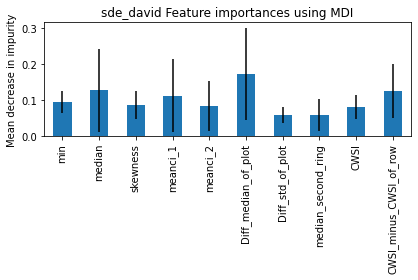

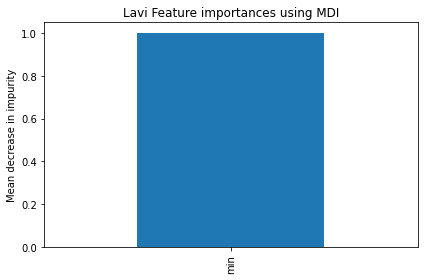

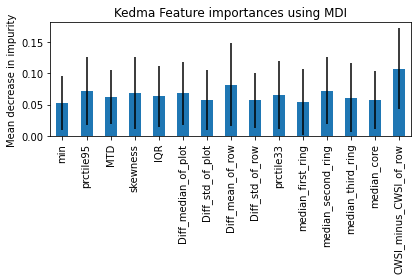

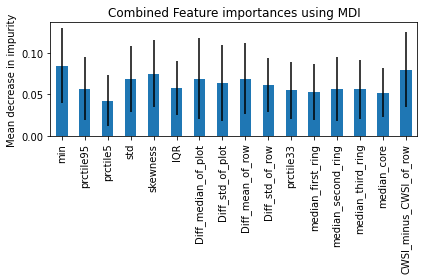

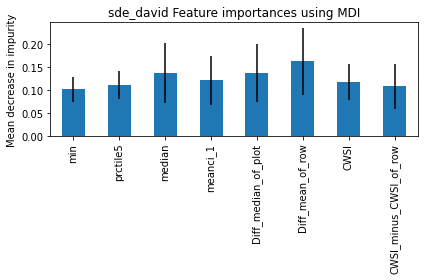

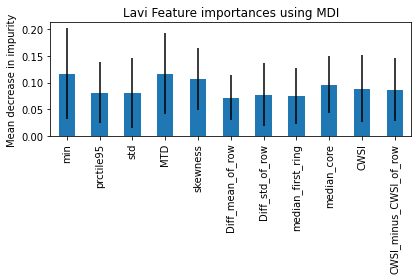

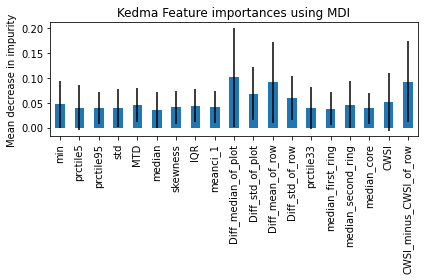

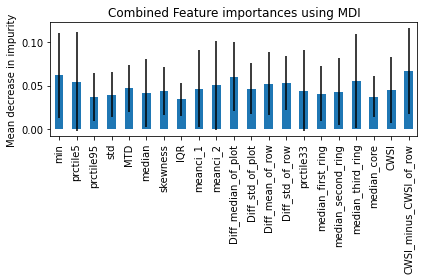

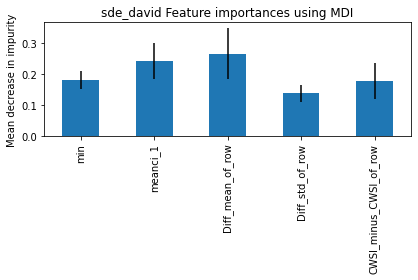

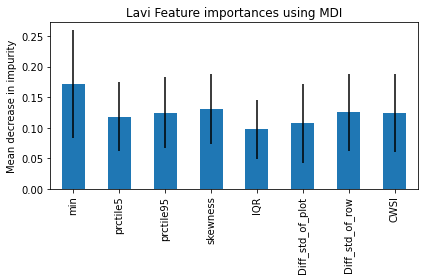

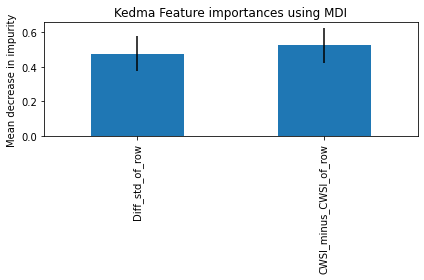

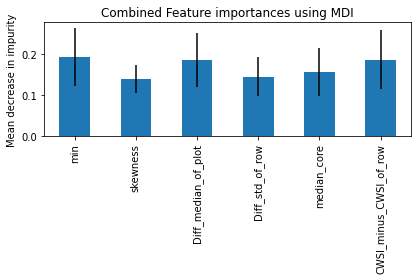

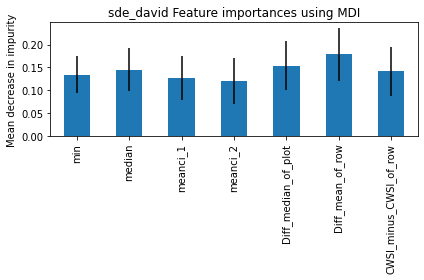

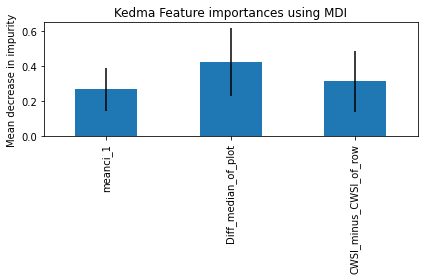

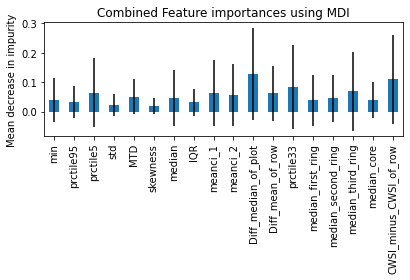

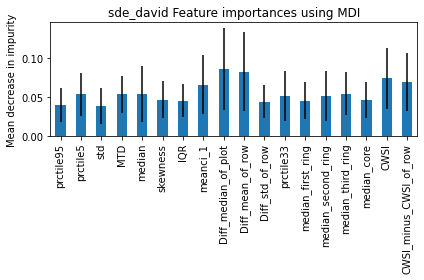

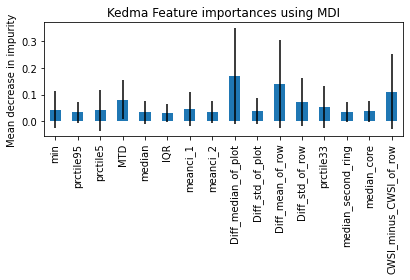

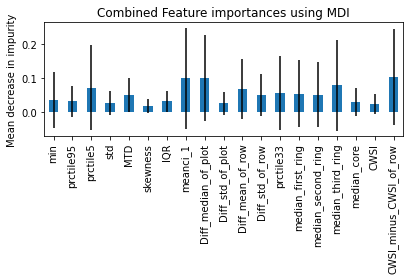

In [9]:

##binary 

featurs = ['min', 'median', 'skewness', 'meanci_1', 'meanci_2', 'Diff_median_of_plot', 'Diff_std_of_plot', 'median_second_ring', 'CWSI', 'CWSI_minus_CWSI_of_row']
print(len(featurs))
sde_david_bin = feature_importantce ("Binary","sde_david","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_SdeDavid_afer_DataPreparation.xlsx",featurs)
featurs = ['min']
print(len(featurs))
Lavi_bin = feature_importantce ("Binary","Lavi","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_Kedma&Lavi_afer_DataPreparation.xlsx",featurs)
featurs = ['min', 'prctile95',  'MTD',  'skewness', 'IQR', 'Diff_median_of_plot', 'Diff_std_of_plot', 'Diff_mean_of_row', 'Diff_std_of_row', 'prctile33', 'median_first_ring', 'median_second_ring','median_third_ring','median_core', 'CWSI_minus_CWSI_of_row']
print(len(featurs))
kedma_bin = feature_importantce ("Binary","Kedma","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_Kedma&Lavi_afer_DataPreparation.xlsx",featurs)
featurs = ['min', 'prctile95','prctile5', 'std','skewness', 'IQR', 'Diff_median_of_plot', 'Diff_std_of_plot', 'Diff_mean_of_row', 'Diff_std_of_row', 'prctile33', 'median_first_ring', 'median_second_ring','median_third_ring','median_core', 'CWSI_minus_CWSI_of_row']
print(len(featurs))
Combined_bin = feature_importantce ("Binary","Combined","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_Kedma&Lavi_afer_DataPreparation.xlsx",featurs)



#multiclass- catagory

featurs = ['min', 'prctile5', 'median', 'meanci_1', 'Diff_median_of_plot', 'Diff_mean_of_row', 'CWSI', 'CWSI_minus_CWSI_of_row']
print(len(featurs))
sde_david_mul = feature_importantce ("Multi_cat","sde_david","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_SdeDavid_afer_DataPreparation.xlsx",featurs)
featurs=['min', 'prctile95', 'std', 'MTD', 'skewness', 'Diff_mean_of_row', 'Diff_std_of_row', 'median_first_ring', 'median_core', 'CWSI', 'CWSI_minus_CWSI_of_row']
print(len(featurs))
Lavi_mul = feature_importantce ("Multi_cat","Lavi","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_Kedma&Lavi_afer_DataPreparation.xlsx",featurs)
featurs=['min', 'prctile5', 'prctile95', 'std', 'MTD', 'median', 'skewness', 'IQR', 'meanci_1', 'Diff_median_of_plot', 'Diff_std_of_plot', 'Diff_mean_of_row', 'Diff_std_of_row', 'prctile33', 'median_first_ring', 'median_second_ring', 'median_core', 'CWSI', 'CWSI_minus_CWSI_of_row']
print(len(featurs))
kedma_mul = feature_importantce ("Multi_cat","Kedma","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_Kedma&Lavi_afer_DataPreparation.xlsx",featurs)
featurs = ['min', 'prctile5', 'prctile95', 'std', 'MTD', 'median', 'skewness', 'IQR', 'meanci_1', 'meanci_2', 'Diff_median_of_plot', 'Diff_std_of_plot', 'Diff_mean_of_row', 'Diff_std_of_row', 'prctile33', 'median_first_ring', 'median_second_ring', 'median_third_ring', 'median_core', 'CWSI', 'CWSI_minus_CWSI_of_row']
print(len(featurs))
Combined_mul = feature_importantce ("Multi_cat","Combined","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_Kedma&Lavi_afer_DataPreparation.xlsx",featurs)


#multiclass- ordinary

featurs=['min', 'meanci_1', 'Diff_mean_of_row', 'Diff_std_of_row', 'CWSI_minus_CWSI_of_row']
print(len(featurs))
sde_david_mul_ordinary = feature_importantce ("Multi_ordinal","sde_david","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_SdeDavid_afer_DataPreparation.xlsx",featurs)

features =  ['min', 'prctile5', 'prctile95', 'skewness', 'IQR', 'Diff_std_of_plot', 'Diff_std_of_row', 'CWSI']
print(len(featurs))
Lavi_mul_ordinary = feature_importantce ("Multi_ordinal","Lavi","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_Kedma&Lavi_afer_DataPreparation.xlsx",features)
featurs = ['Diff_std_of_row', 'CWSI_minus_CWSI_of_row']
print(len(featurs))
kedma_mul_ordinary = feature_importantce ("Multi_ordinal","Kedma","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_Kedma&Lavi_afer_DataPreparation.xlsx",featurs)
featurs = ['min', 'skewness', 'Diff_median_of_plot', 'Diff_std_of_row', 'median_core', 'CWSI_minus_CWSI_of_row']
print(len(featurs))
Combined_mul_ordinary = feature_importantce ("Multi_ordinal","Combined","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_Kedma&Lavi_afer_DataPreparation.xlsx",featurs)

##stage_1

featurs = ['min', 'median','meanci_1', 'meanci_2', 'Diff_median_of_plot','Diff_mean_of_row','CWSI_minus_CWSI_of_row']
print(len(featurs))
sde_david_1 = feature_importantce ("stage_1","sde_david","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\SdeDavid_train_set_stage1.xlsx",featurs)
featurs = ['meanci_1', 'Diff_median_of_plot','CWSI_minus_CWSI_of_row']
print(len(featurs))
kedma_1 = feature_importantce ("stage_1","Kedma","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\Kedma_train_set_stage1.xlsx",featurs)
featurs = ['min', 'prctile95','prctile5','std','MTD','skewness','median','IQR','meanci_1', 'meanci_2','Diff_median_of_plot','Diff_mean_of_row' ,'prctile33','median_first_ring','median_second_ring','median_third_ring','median_core', 'CWSI_minus_CWSI_of_row']
print(len(featurs))
Combined_1 = feature_importantce ("stage_1","Combined","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\Lavi&Kedma_train_set_stage1.xlsx",featurs)


# ##stage_2

featurs = ['prctile95','prctile5','std','MTD','median','skewness','IQR','meanci_1','Diff_median_of_plot','Diff_mean_of_row' ,'Diff_std_of_row','prctile33','median_first_ring','median_second_ring','median_third_ring','median_core','CWSI','CWSI_minus_CWSI_of_row']
print(len(featurs))
sde_david_2 = feature_importantce ("stage_2","sde_david","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_SdeDavid_afer_DataPreparation.xlsx",featurs)
featurs = ['min', 'prctile95','prctile5','MTD','median','IQR','meanci_1', 'meanci_2','Diff_median_of_plot','Diff_std_of_plot','Diff_mean_of_row' ,'Diff_std_of_row','prctile33','median_second_ring','median_core', 'CWSI_minus_CWSI_of_row']
print(len(featurs))
kedma_2 = feature_importantce ("stage_2","Kedma","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_Kedma&Lavi_afer_DataPreparation.xlsx",featurs)
featurs = ['min', 'prctile95','prctile5','std','MTD','skewness','IQR','meanci_1','Diff_median_of_plot','Diff_std_of_plot','Diff_mean_of_row' ,'Diff_std_of_row','prctile33','median_first_ring','median_second_ring','median_third_ring','median_core','CWSI','CWSI_minus_CWSI_of_row']
print(len(featurs))
Combined_2 = feature_importantce ("stage_2","Combined","C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_Kedma&Lavi_afer_DataPreparation.xlsx",featurs)





#\\SdeDavid_train_set_stage1
importance = [sde_david_bin,Lavi_bin,kedma_bin,Combined_bin,sde_david_mul,Lavi_mul,kedma_mul,Combined_mul,sde_david_mul_ordinary,Lavi_mul_ordinary,kedma_mul_ordinary,Combined_mul_ordinary,sde_david_1,kedma_1,Combined_1,sde_david_2,kedma_2,Combined_2]
importance = pd.DataFrame(importance)
print(importance)
importance.to_csv("Feature_importance.csv")

In [87]:
table = pd.read_excel("C:\\Users\\Stav\\Desktop\\paperSubmission\\table.xlsx")
table = table.fillna(method='ffill',axis = 1)

In [70]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(table)

                      Unnamed: 0 Multiclass Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0                            NaN        NaN        NaN        NaN        NaN   
1                            NaN    Ordinal    Ordinal    Ordinal    Ordinal   
2                       Features          K          L          C          S   
3                            Min          0          +          +          +   
4                   Percentile 5          0          +          +          +   
5                  Percentile 95          0          +          +          +   
6                            STD          0          0          0          0   
7                            MTD          0          0          0          0   
8                         Median          0          0          0          0   
9                       Skewness          0          +          +          +   
10                           IQR          0          +          +          +   
11                     Meanci LB        